<a href="https://colab.research.google.com/github/Paloma-Moya-Tudela/deeplearning/blob/main/Ejercicio%20Regularizadores%20Completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [112]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [113]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # Descarga los datos de MNIST

In [114]:
# Prepara con reshape:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
# Y normaliza las imágenes tanto de entrenamiento como de test:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [115]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images = train_images[50000:]
validation_labels = train_labels[50000:]

In [116]:
from __future__ import print_function
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  model = models.Sequential()
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  if regularizador == 0:
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  elif regularizador == 1:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),activation='relu', input_shape=(28*28,)))
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  elif regularizador == 2:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(28*28,)))
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  elif regularizador == 3:
    model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu', input_shape=(28*28,)))
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  elif regularizador == 4:
    #layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
    #layer_output /= 0.5
    model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dropout(0.5))
  # Si es distinto que estos valores, escribe el error y retorna
  else:
    print('\nEl valor introducido no es correcto\n')
    return
  model.add(layers.Dense(10, activation='softmax'))
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model.summary()
  return model

In [117]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [118]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history = modelo.fit(train_images, train_labels, epochs=30, batch_size=128, validation_data=(validation_images,validation_labels))
  return history

In [119]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [120]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [121]:
network0 = crea_modelo(0)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [122]:
network0 = compila_modelo(network0)

In [123]:
historia0 = entrena_modelo(network0)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2587 - accuracy: 0.9246 - val_loss: 0.1294 - val_accuracy: 0.9627
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1039 - accuracy: 0.9688 - val_loss: 0.0629 - val_accuracy: 0.9816
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0683 - accuracy: 0.9793 - val_loss: 0.0441 - val_accuracy: 0.9875
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0500 - accuracy: 0.9853 - val_loss: 0.0316 - val_accuracy: 0.9904
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0371 - accuracy: 0.9889 - val_loss: 0.0209 - val_accuracy: 0.9941
Epoch 6/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0261 - val_accuracy: 0.9921
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.0220 - accuracy: 0.9936 - val_loss: 0.0133 - val_accuracy: 0.9967
Epoch 

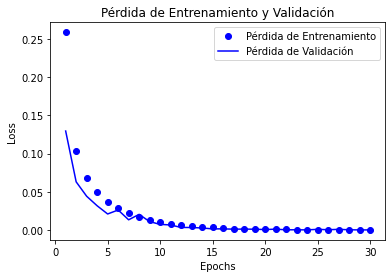

In [124]:
pinta_perdida_entrenamiento_validacion(historia0)

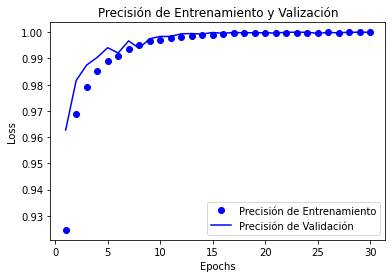

In [125]:
pinta_precision_entrenamiento_validacion(historia0)

Ambas gráficas anteriores nos ayudan a visualizar las conclusiones a las quer se ha llegado anteriormente.

### Caso 1: Con regularizador l1

In [126]:
network1 = crea_modelo(1)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [127]:
network1 = compila_modelo(network1)

In [128]:
historia1 = entrena_modelo(network1)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 1.9516 - accuracy: 0.8497 - val_loss: 0.9887 - val_accuracy: 0.8831
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.9195 - accuracy: 0.8883 - val_loss: 0.8415 - val_accuracy: 0.8981
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.8004 - accuracy: 0.9096 - val_loss: 0.9033 - val_accuracy: 0.8599
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7298 - accuracy: 0.9211 - val_loss: 0.7002 - val_accuracy: 0.9331
Epoch 5/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6798 - accuracy: 0.9297 - val_loss: 0.6169 - val_accuracy: 0.9482
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6446 - accuracy: 0.9357 - val_loss: 0.6047 - val_accuracy: 0.9459
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6197 - accuracy: 0.9402 - val_loss: 0.5862 - val_accuracy: 0.9485
Epoch 

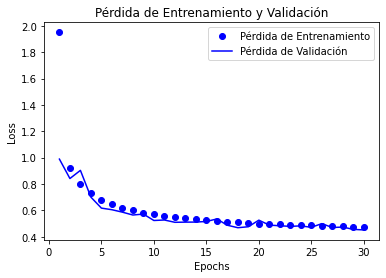

In [129]:
pinta_perdida_entrenamiento_validacion(historia1)

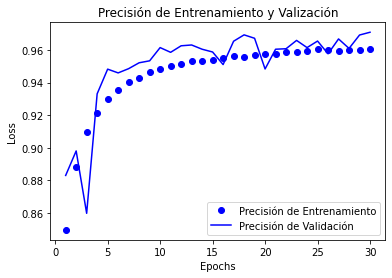

In [130]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [131]:
network2 = crea_modelo(2)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [132]:
network2 = compila_modelo(network2)

In [133]:
historia2 = entrena_modelo(network2)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.4903 - accuracy: 0.9176 - val_loss: 0.3199 - val_accuracy: 0.9398
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.2435 - accuracy: 0.9575 - val_loss: 0.1922 - val_accuracy: 0.9678
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1983 - accuracy: 0.9647 - val_loss: 0.1814 - val_accuracy: 0.9692
Epoch 4/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1786 - accuracy: 0.9678 - val_loss: 0.1386 - val_accuracy: 0.9816
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1652 - accuracy: 0.9705 - val_loss: 0.1447 - val_accuracy: 0.9775
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1592 - accuracy: 0.9714 - val_loss: 0.1291 - val_accuracy: 0.9831
Epoch 7/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1525 - accuracy: 0.9731 - val_loss: 0.1273 - val_accuracy: 0.9815
Epoch 

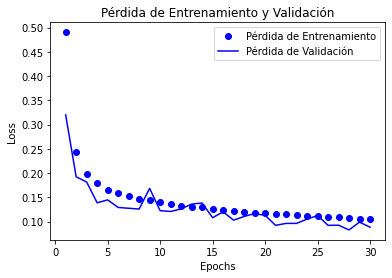

In [134]:
pinta_perdida_entrenamiento_validacion(historia2)

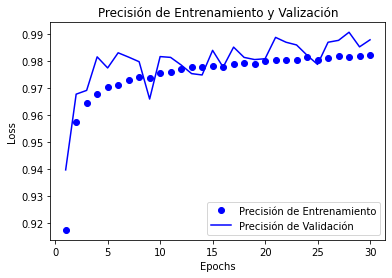

In [135]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [136]:
network3 = crea_modelo(3)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 512)               401920    
                                                                 
 dense_19 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [137]:
network3 = compila_modelo(network3)

In [138]:
historia3 = entrena_modelo(network3)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 1.9803 - accuracy: 0.8473 - val_loss: 0.9509 - val_accuracy: 0.8941
Epoch 2/30
469/469 [==============================] - 2s 3ms/step - loss: 0.9301 - accuracy: 0.8857 - val_loss: 0.9148 - val_accuracy: 0.8844
Epoch 3/30
469/469 [==============================] - 2s 4ms/step - loss: 0.8158 - accuracy: 0.9067 - val_loss: 0.8169 - val_accuracy: 0.9055
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.7442 - accuracy: 0.9195 - val_loss: 0.6800 - val_accuracy: 0.9393
Epoch 5/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6984 - accuracy: 0.9269 - val_loss: 0.6677 - val_accuracy: 0.9375
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.6614 - accuracy: 0.9325 - val_loss: 0.6104 - val_accuracy: 0.9477
Epoch 7/30
469/469 [==============================] - 2s 3ms/step - loss: 0.6351 - accuracy: 0.9375 - val_loss: 0.6356 - val_accuracy: 0.9350
Epoch 

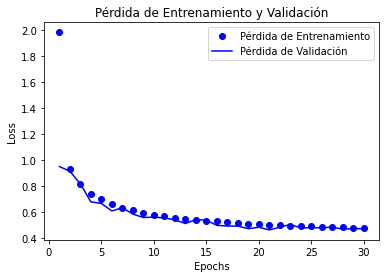

In [139]:
pinta_perdida_entrenamiento_validacion(historia3)

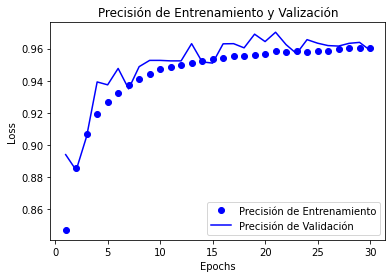

In [140]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [141]:
network4 = crea_modelo(4)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [142]:
network4 = compila_modelo(network4)

In [143]:
historia4 = entrena_modelo(network4)

Epoch 1/30
469/469 [==============================] - 2s 4ms/step - loss: 0.3145 - accuracy: 0.9076 - val_loss: 0.1284 - val_accuracy: 0.9644
Epoch 2/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1535 - accuracy: 0.9546 - val_loss: 0.0860 - val_accuracy: 0.9754
Epoch 3/30
469/469 [==============================] - 2s 3ms/step - loss: 0.1181 - accuracy: 0.9649 - val_loss: 0.0631 - val_accuracy: 0.9829
Epoch 4/30
469/469 [==============================] - 2s 4ms/step - loss: 0.1007 - accuracy: 0.9697 - val_loss: 0.0515 - val_accuracy: 0.9842
Epoch 5/30
469/469 [==============================] - 2s 5ms/step - loss: 0.0862 - accuracy: 0.9741 - val_loss: 0.0428 - val_accuracy: 0.9880
Epoch 6/30
469/469 [==============================] - 2s 4ms/step - loss: 0.0779 - accuracy: 0.9767 - val_loss: 0.0390 - val_accuracy: 0.9881
Epoch 7/30
469/469 [==============================] - 1s 3ms/step - loss: 0.0714 - accuracy: 0.9792 - val_loss: 0.0352 - val_accuracy: 0.9899
Epoch 

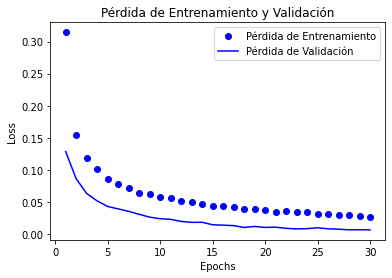

In [144]:
pinta_perdida_entrenamiento_validacion(historia4)

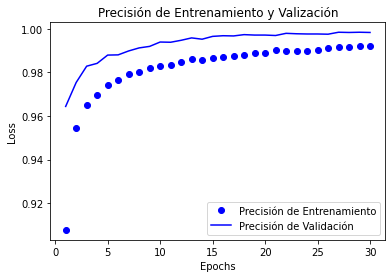

In [145]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [146]:
network5 = crea_modelo(5)


El valor introducido no es correcto



### CONCLUSIONES

Nuestro fin es ser capaces de dar respuesta a la siguiente pregunta: ¿qué regularizador funciona mejor para este caso? Con este objetivo en mente, se recopilarán las mayores precisiones alcanzadas por cada modelo - tanto de los datos de entrenamiento, como los de validación - en el siguiente esquema:

Sin regularizador:
- Precisión datos de entrenamiento: 0.9999
- Precisión datos de validación: 1.0000

Regularizador l1:
- Precisión datos de entrenamiento: 0.9604
- Precisión datos de validación: 0.9708

Regularizador l2:
- Precisión datos de entrenamiento: 0.9822
- Precisión datos de validación: 0.9907

Regularizador l1_l2:
- Precisión datos de entrenamiento: 0.9606
- Precisión datos de validación: 0.9702

Dropout:
- Precisión datos de entrenamiento: 0.9921
- Precisión datos de validación: 0.9985

Llama la atención que todos los modelos provocan una mayor precisión con los datos de validación que aquellos de entrenamiento. Esto es llamativo debido a que significa que los modelos funcionan mejor con datos que nunca han visto, que aquellos con los que está trabajando.

Cabe destacar el importante papel de los diversos regularizadores para 'aareglar' el sobre-entrenemiento.

Para buscar el modelo más óptimo de nuestro problema buscaremos aquel caso en que contenga la mejor precisión de datos de validación de todas. Sin embargo, debemos tener en cuenta que esta no sería la solución más óptima, ya que existe la característica de la aleatoriedad de los pesos: esto nos provocará valores ligeramente distintos en futuras ejecuciones del código, y puede que sea suficiente como para cambiar de modelo concluido.

Por tanto, el mejor modelo será el 'Caso 0'. Entre aquellos que contienen regularizadores, el mejor modelo correspondería al 'Caso 2'; aunque éste último tiene una menor precisión que el del último caso, en el que aplicamos 'Dropout'.